In [5]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statistics import mean, variance, pvariance
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.utils import resample

In [6]:
data = pd.read_csv("processedlaptopinfo.csv", sep = ",")
# data = data.sample(frac=1).reset_index(drop=True)
data = data.drop('Unnamed: 0', axis=1)

data = resample(data, n_samples = 470, random_state=0)

traindata, testdata = train_test_split(data, test_size=0.2, random_state=42)

# traindata = data[:-83]
# testdata = data[340:]

# print(traindata.shape)
# print(testdata.shape)

Xtrain = traindata.drop('Price', axis = 1)
ytrain = traindata[['Price']]

Xtest = testdata.drop('Price', axis = 1)
ytest = testdata[['Price']]

In [7]:
neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(Xtrain, ytrain.values.ravel())
ypredict = neigh.predict(Xtest)
mean_absolute_error(ytest.values.ravel(), ypredict)
# cv_results = cross_validate(neigh, data.drop('Price', axis=1), data['Price'], return_train_score=False)
# cv_results['test_score'] 

1020308.5106382979

[0.0, 0.0, 0.0, 0.0, 3400000.0, -2700000.0, 0.0, -4210000.0, 0.0, 100000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4000000.0, 0.0, 100000.0, 0.0, -10100000.0, 0.0, 1740000.0, 1500000.0, 0.0, 200000.0, 3700000.0, 0.0, -2700000.0, 2300000.0, -6300000.0, 0.0, 0.0, -2350000.0, -1700000.0, 0.0, 0.0, 0.0, -2700000.0, 0.0, 0.0, 0.0, 1500000.0, 0.0, 600000.0, 0.0, 0.0, 4000000.0, 0.0, 0.0, -7000000.0, 0.0, -2300000.0, 0.0, 0.0, 4000000.0, 0.0, 0.0, 0.0, -1700000.0, 509000.0, 0.0, 0.0, -3500000.0, 0.0, 0.0, 0.0, -900000.0, 3600000.0, -1500000.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1300000.0, 0.0, 0.0, -200000.0, 0.0, -200000.0, 0.0, -4000000.0, 0.0, -200000.0, -900000.0, -1250000.0, 0.0, 0.0, 3750000.0, -2300000.0, 900000.0, 0.0, 0.0]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if __name__ == '__main__':


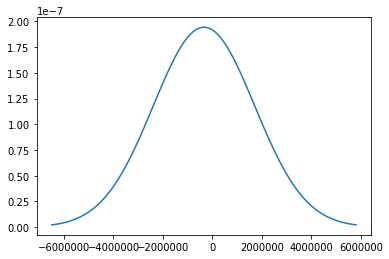

-341606.3829787234
4207300628345.9165
2051170.550769954


In [8]:
err = []
for idx in range(len(ytest.values.ravel())):
    err.append(ytest.values.ravel()[idx]-ypredict[idx])
print (err)
mu = mean(err) #mean_absolute_error(flattentest, ypredict)
var = variance(err) #mean_squared_error(flattentest, ypredict)
sigma = math.sqrt(var)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
print (mu)
print (var)
print (sigma)